In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('C:\\Users\\lesedi msiya\\Desktop\\Level 2 Assesments\\L2T17\\wine.csv')
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude
...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,US,Subdued is a good way to describe this light-b...,NaN,87,12.0,California,California,California Other,White Blend,Kitchen Sink
1099,1099,US,"While spry and dry in style, fragrant apricot ...",Hobbit Hollow Farm Dry,87,20.0,New York,Finger Lakes,Finger Lakes,Riesling,Heron Hill
1100,1100,US,Coming from the cool 2011 vintage this wine of...,Cold Creek Vineyard,87,28.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Chateau Ste. Michelle
1101,1101,France,"This concentrated, structured wine has an eart...",NaN,87,27.0,Bordeaux,Listrac-M√©doc,NaN,Bordeaux-style Red Blend,Ch√¢teau Vieux Moulin


In [4]:
# analysing missing data
missing_values = df.isnull().sum()
missing_values

Unnamed: 0       0
country          0
description      0
designation    269
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
winery           0
dtype: int64

The missing data is in designation , price, region 1 an region 2.

In [5]:
 #Handling missing data
 # price column
price_mean = df['price'].mean()
price_mean = round(price_mean,1)
missing_prices = df['price'].fillna(price_mean)



In [6]:
#Handling missing data
# designation column
designation_mean =df['designation'].mode()
missing_designation = df['designation'].fillna('Estate')


Imputation was used on the price and designation column, missing values were replaced with the mean of the price column and the mode was used to replace missing values in the designation column. The missing data on region 1 and region 2 is missing completely at random, although for region_2 there is data similar to that of region 1,it is not the case for all rows some have completely different values than region 1 so which is why imputaion can not be made because its not 100% given that values in region 1 will be the same as values in region 2, additionally region 2 has alot of missing values which means that using data in this column will give an incorrect representaion of the data, hence this column will be dropped. Region 1 has 173 missiing values, mode can not be used to replace these missing values because the regions are depandant on the province but you can not predict the region from knowing the province because you cant be certain which region the wine is from exactly just by knowing the province, for example in the california province the region can either be napa valley, knights valley, livemore valley ,etc. there is no certainty hence the region 1 column will not be imputed.  

In [146]:
# dropping the region 2 column
df.drop(['region_2'], axis =1, inplace = True)
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la B√©gude
...,...,...,...,...,...,...,...,...,...,...
1098,1098,US,Subdued is a good way to describe this light-b...,NaN,87,12.0,California,California,White Blend,Kitchen Sink
1099,1099,US,"While spry and dry in style, fragrant apricot ...",Hobbit Hollow Farm Dry,87,20.0,New York,Finger Lakes,Riesling,Heron Hill
1100,1100,US,Coming from the cool 2011 vintage this wine of...,Cold Creek Vineyard,87,28.0,Washington,Columbia Valley (WA),Merlot,Chateau Ste. Michelle
1101,1101,France,"This concentrated, structured wine has an eart...",NaN,87,27.0,Bordeaux,Listrac-M√©doc,Bordeaux-style Red Blend,Ch√¢teau Vieux Moulin


In [7]:
duplicate = df[df.duplicated()]
num_dupli = duplicate.count()
print(num_dupli)
print(duplicate)

Unnamed: 0     0
country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
region_2       0
variety        0
winery         0
dtype: int64
Empty DataFrame
Columns: [Unnamed: 0, country, description, designation, points, price, province, region_1, region_2, variety, winery]
Index: []


There are no rows that are duplicated in the data frame.

<AxesSubplot:xlabel='count', ylabel='country'>

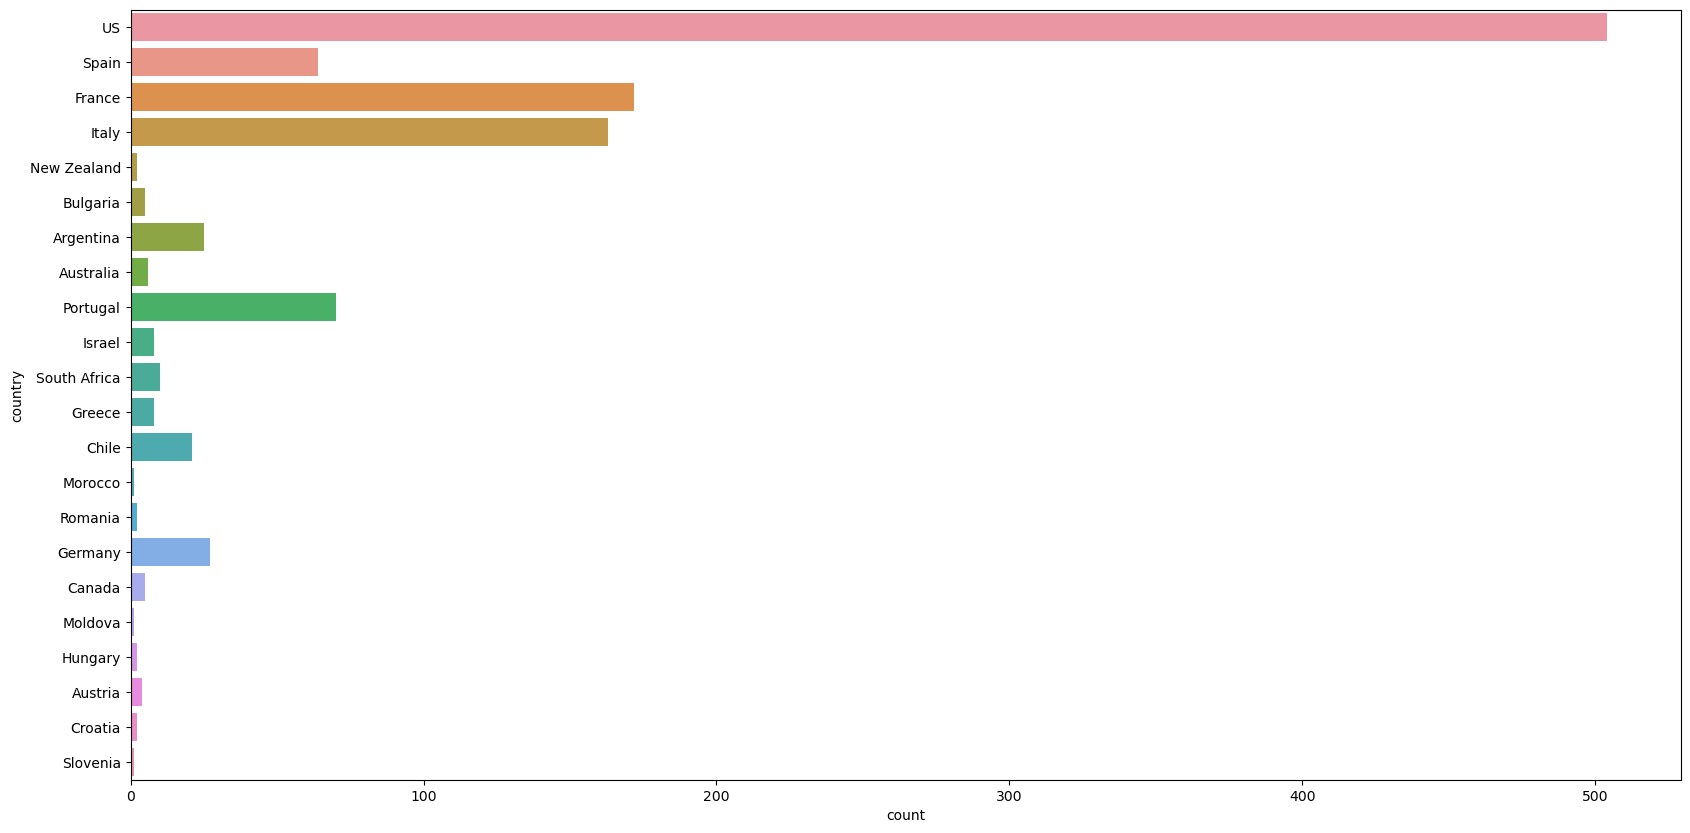

In [47]:
# analying the country column
fig = plt.figure(figsize=(20,10))
sns.countplot(y ='country',data = df)

The US produces and sells more wine than any other country.

array([<AxesSubplot:ylabel='fuel type'>], dtype=object)

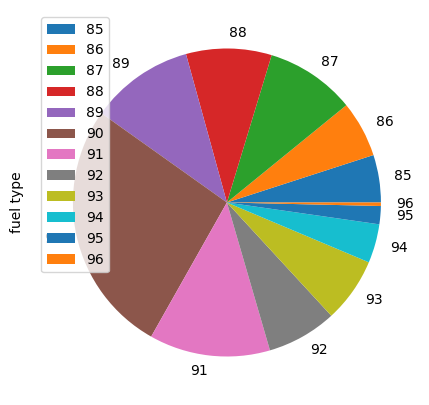

In [29]:
# analysing points
points_group = df.groupby(by='points')
points_count = points_group.count()
points_df = pd.DataFrame(points_count.iloc[:,0])
points_df.rename(columns={'Unnamed: 0': 'ponts'}, inplace=True)
points_df.plot.pie(subplots= True, figsize = (5,5), ylabel = 'fuel type')

Most wines are given 90 points, this shows that most wines of of good quality.

<AxesSubplot:xlabel='count', ylabel='province'>

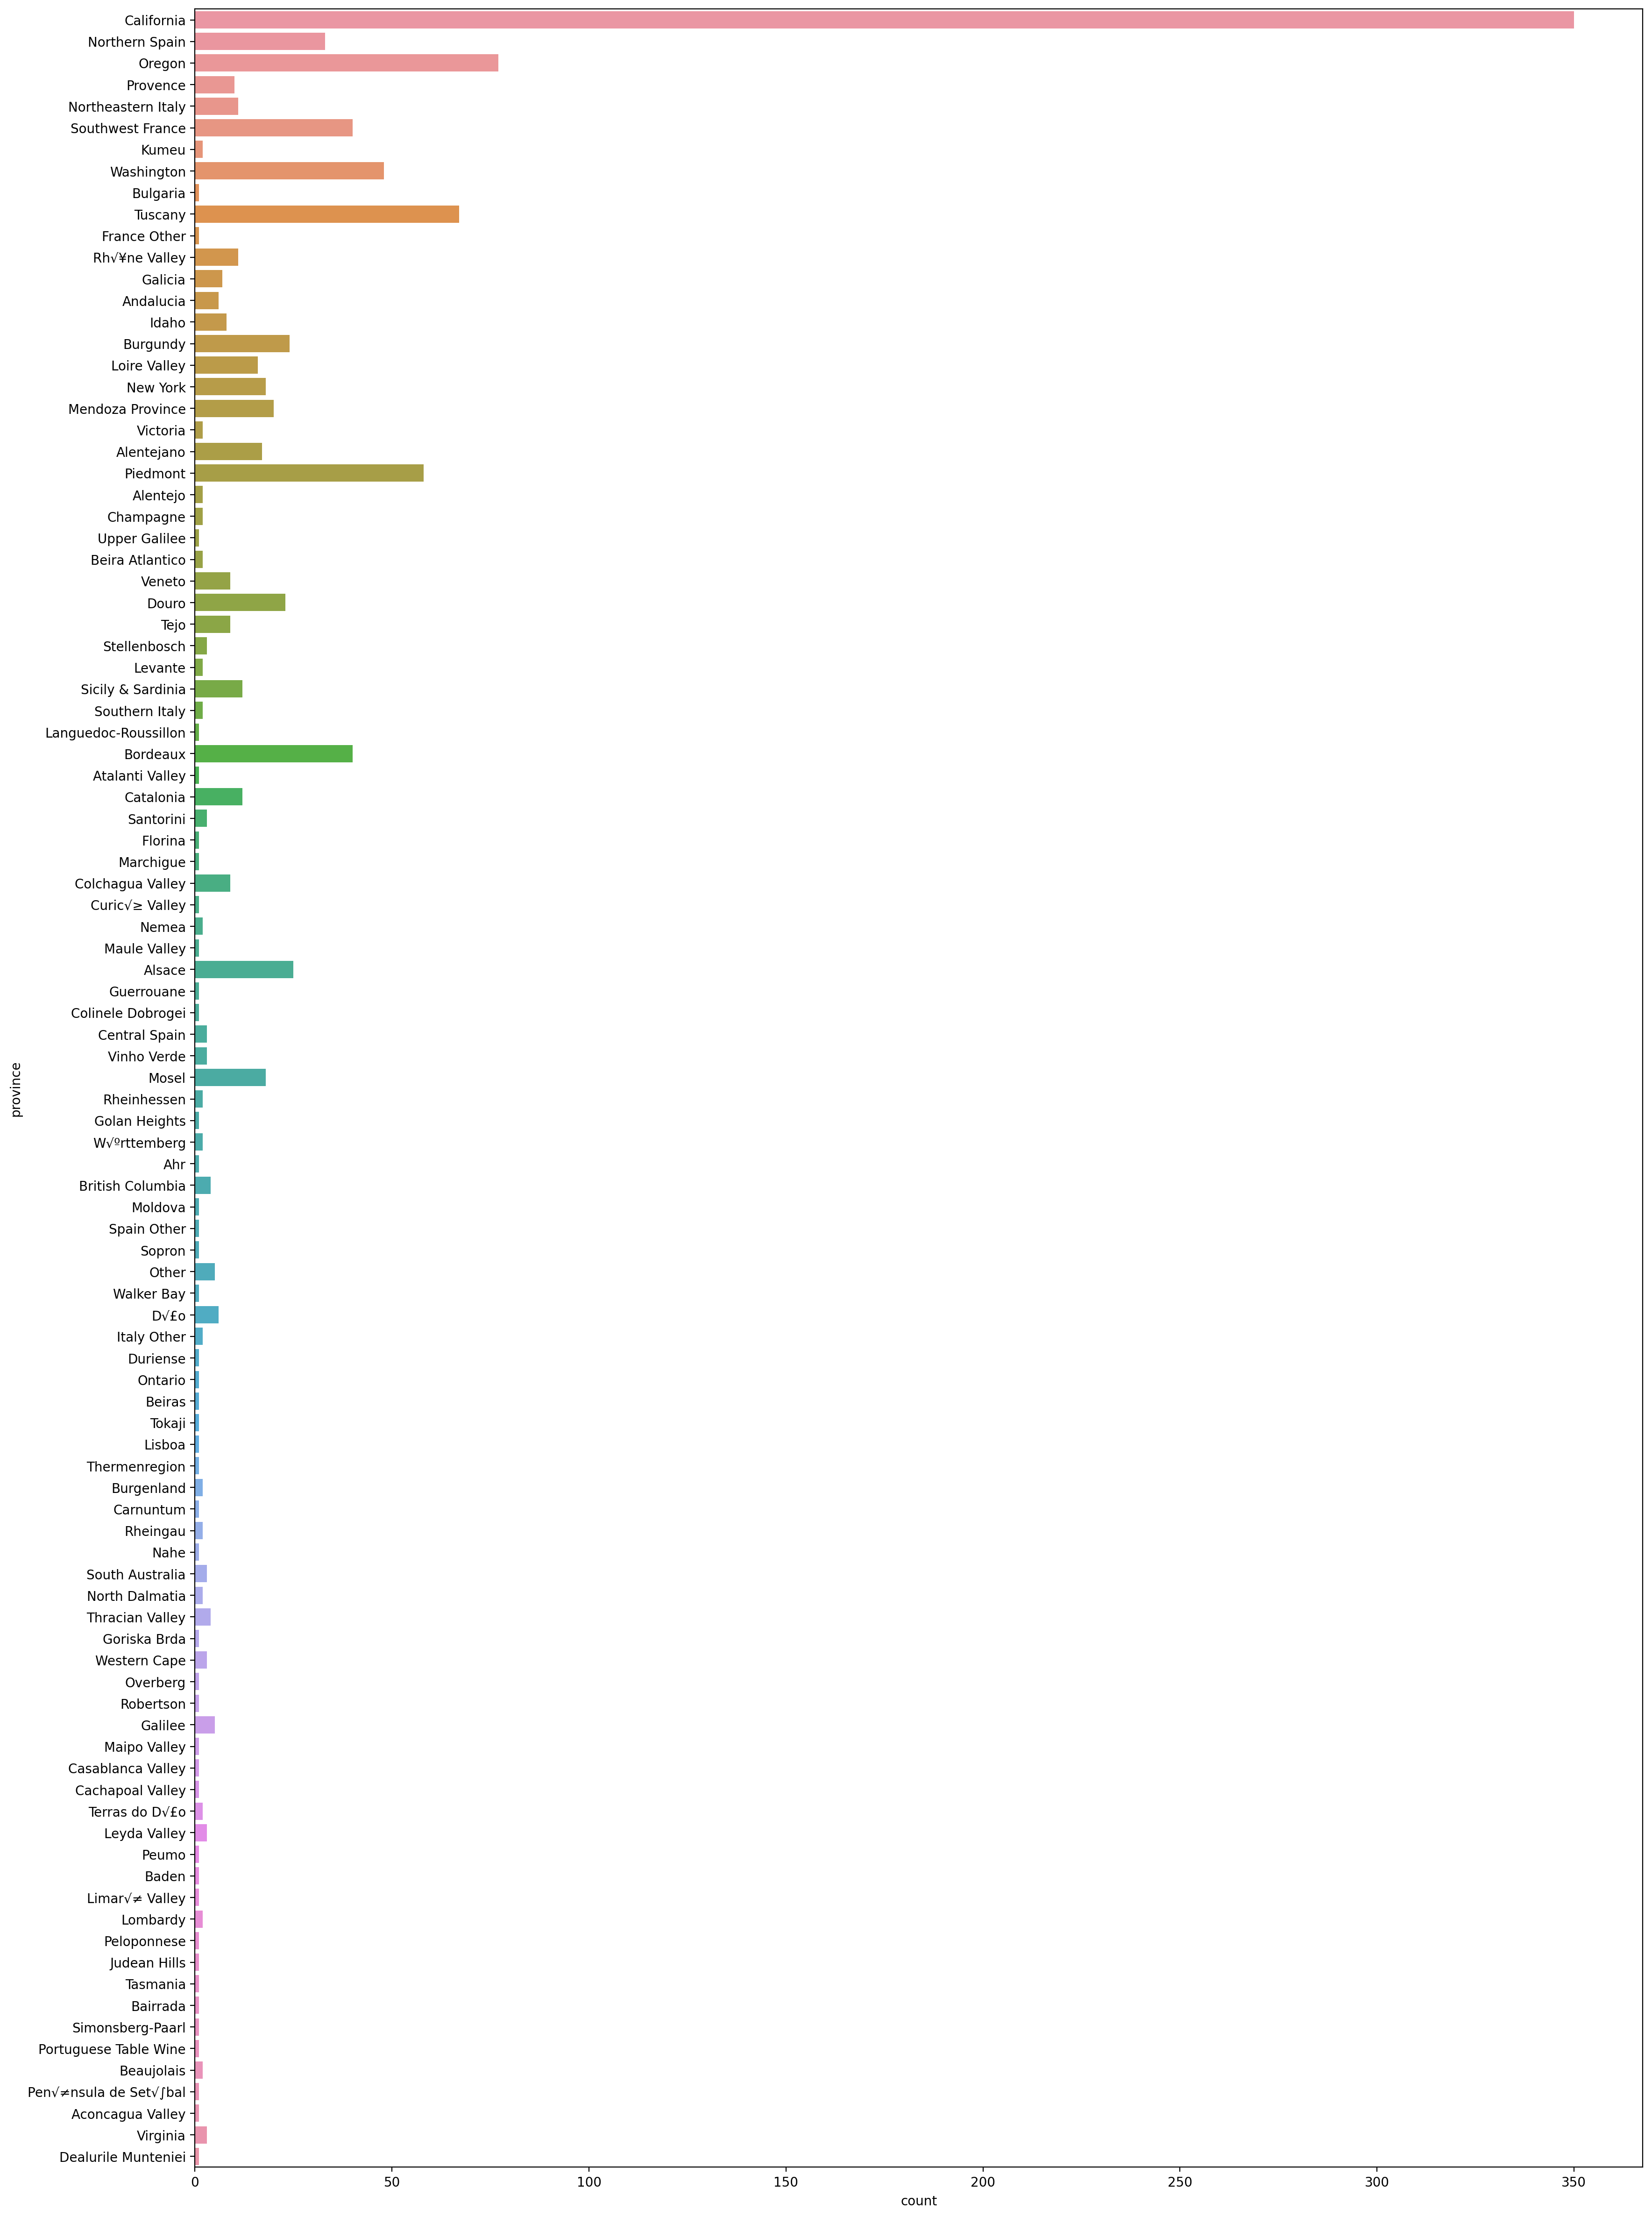

In [144]:
#analysing the province column
fig = plt.figure(figsize=(20,30))
sns.countplot(y ='province',data = df)

The province that produces most wine is California, which is expected as California is located in the US.

<AxesSubplot:xlabel='variety', ylabel='price'>

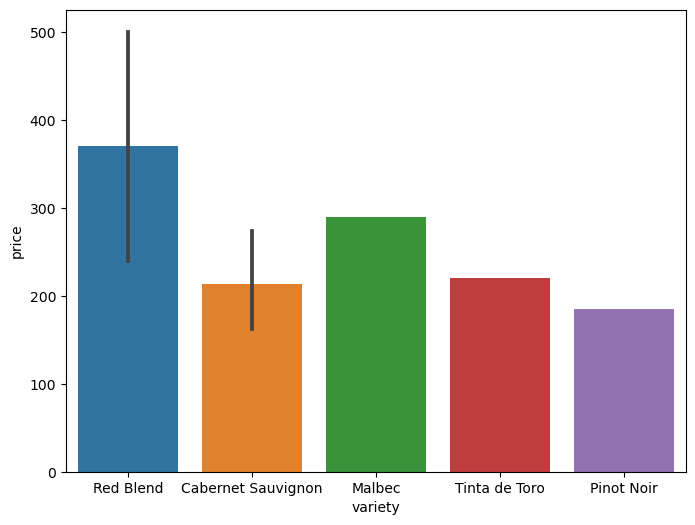

In [52]:
# Analying the most expensive wine variety
expensive = df.sort_values(by='price', ascending = False).head(10)
expensive_variety = pd.DataFrame(expensive, columns=['price','variety'])
fig = plt.figure(figsize=(8,6))
sns.barplot(data= expensive_variety, x = 'variety', y = 'price')


The Red blend is the most expensive wine variety followed by the Malbec and Tinta de Toro

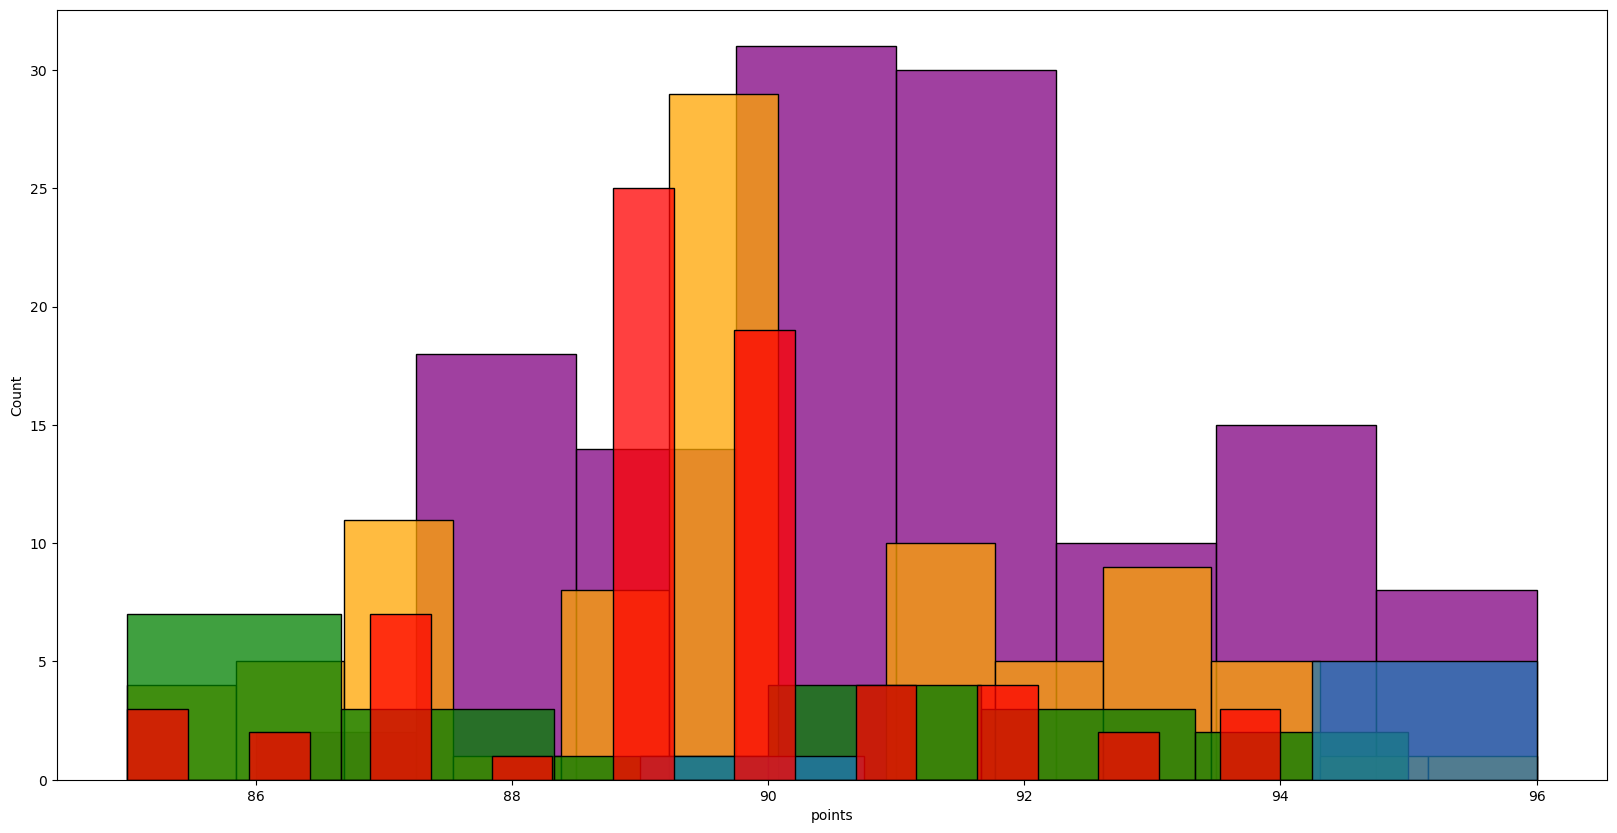

In [51]:
# analysing the top 5 expensive varieties and thier points
fig = plt.figure(figsize=(20, 10))
sns.histplot(df.loc[df['variety'] =='Pinot Noir' ]['points'], kde_kws={'label': 'Red Blend'},color ='purple');
sns.histplot(df.loc[df['variety'] =='Cabernet Sauvignon' ]['points'], kde_kws={'label': 'Carbernet Sauvignon'}, color = 'orange');
sns.histplot(df.loc[df['variety'] =='Malbec' ]['points'], kde_kws={'label': 'Malbec'},color ='green');
sns.histplot(df.loc[df['variety'] =='Tinta de Toro' ]['points'], kde_kws={'label': 'Tinta de Toro'});
sns.histplot(df.loc[df['variety'] =='Red Blend']['points'], kde_kws={'label': 'Pinot Noir'},color ='red');


The Pinot Noir produces wine with the highest points, it has the highest points from 90 - 96 points, its points the higher than the other wine varieties that are more expensive than it.

<AxesSubplot:xlabel='variety', ylabel='price'>

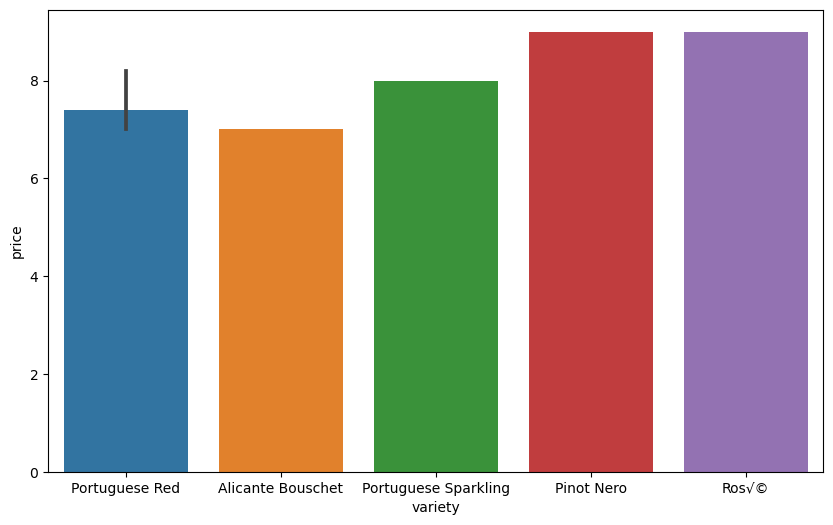

In [58]:
#analysing the cheapest varieties
cheap = df.sort_values(by='price', ascending = True).head(9)
cheap_variety = pd.DataFrame(cheap, columns=['price','variety'])
fig = plt.figure(figsize=(10,6))
sns.barplot(data= cheap_variety, x = 'variety', y = 'price')


The cheapest variety is Alicante Bouschet followed by the Portuguese Red 

<AxesSubplot:xlabel='count', ylabel='variety'>

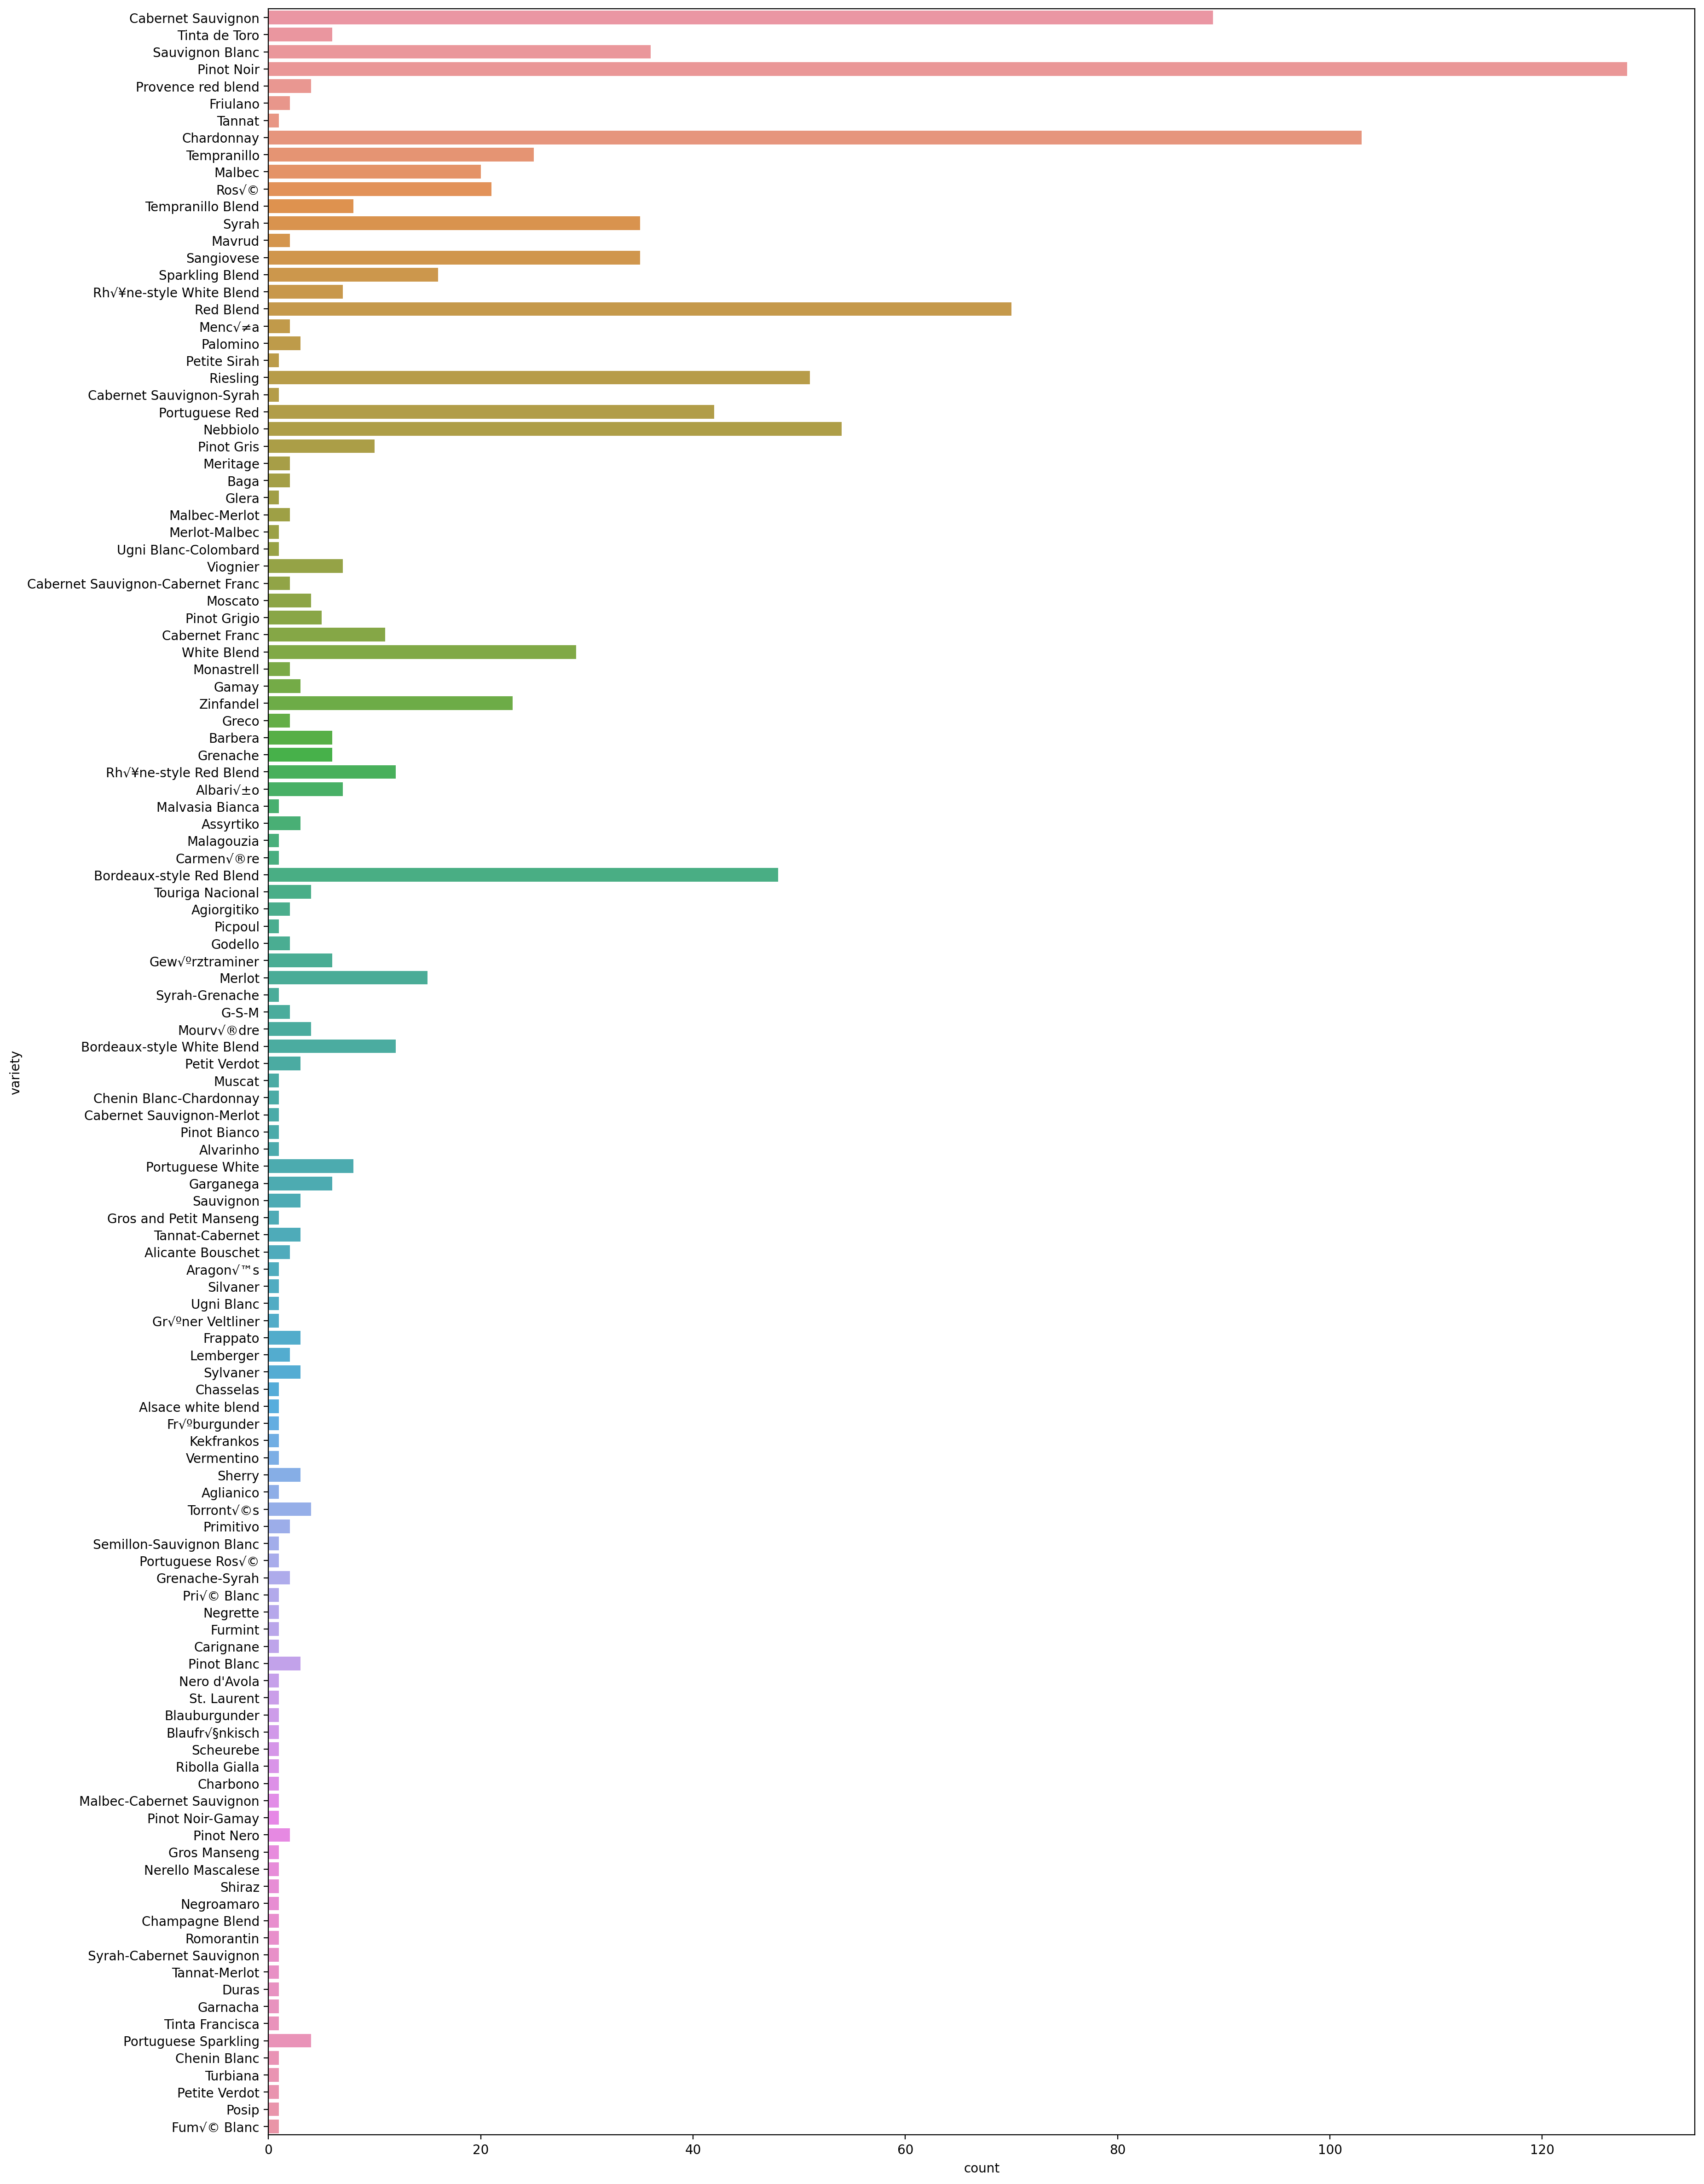

In [143]:
#analysing the wine variety that is purchased the most
fig = plt.figure(figsize=(20,30))
sns.countplot(y ='variety',data = df)

The Pinot Noir is the most frequently purchased variety, this variety is one of the most expesive wines and has the highest points, this shows that most people love this variety, also it is not the most expensive its number 5 in the top 5 expensive varieties so perhaps it is a bit more affordable than the other vaireties and is of good quality which is why most people tend to purchase it. 

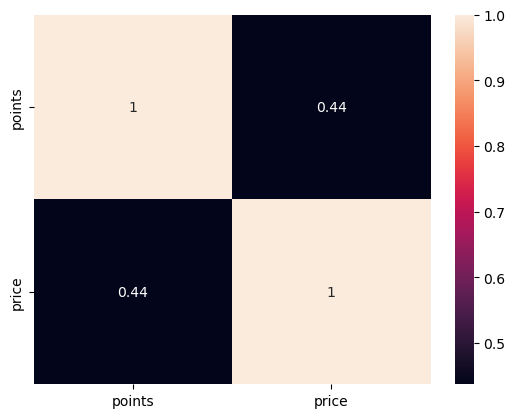

In [78]:
# andlysing the correlation between price and points.

compare_to_price = df[['points','price']]
plt.figure()
correlation = compare_to_price.corr()
sns.heatmap(correlation, annot= True)
plt.show()

The correlation between price and points is high, this means that the points and price of wine do affect each other, the wines with the highest points may be the one of the most expensive wines.

Text(0.5, 1.0, 'Chardonnay')

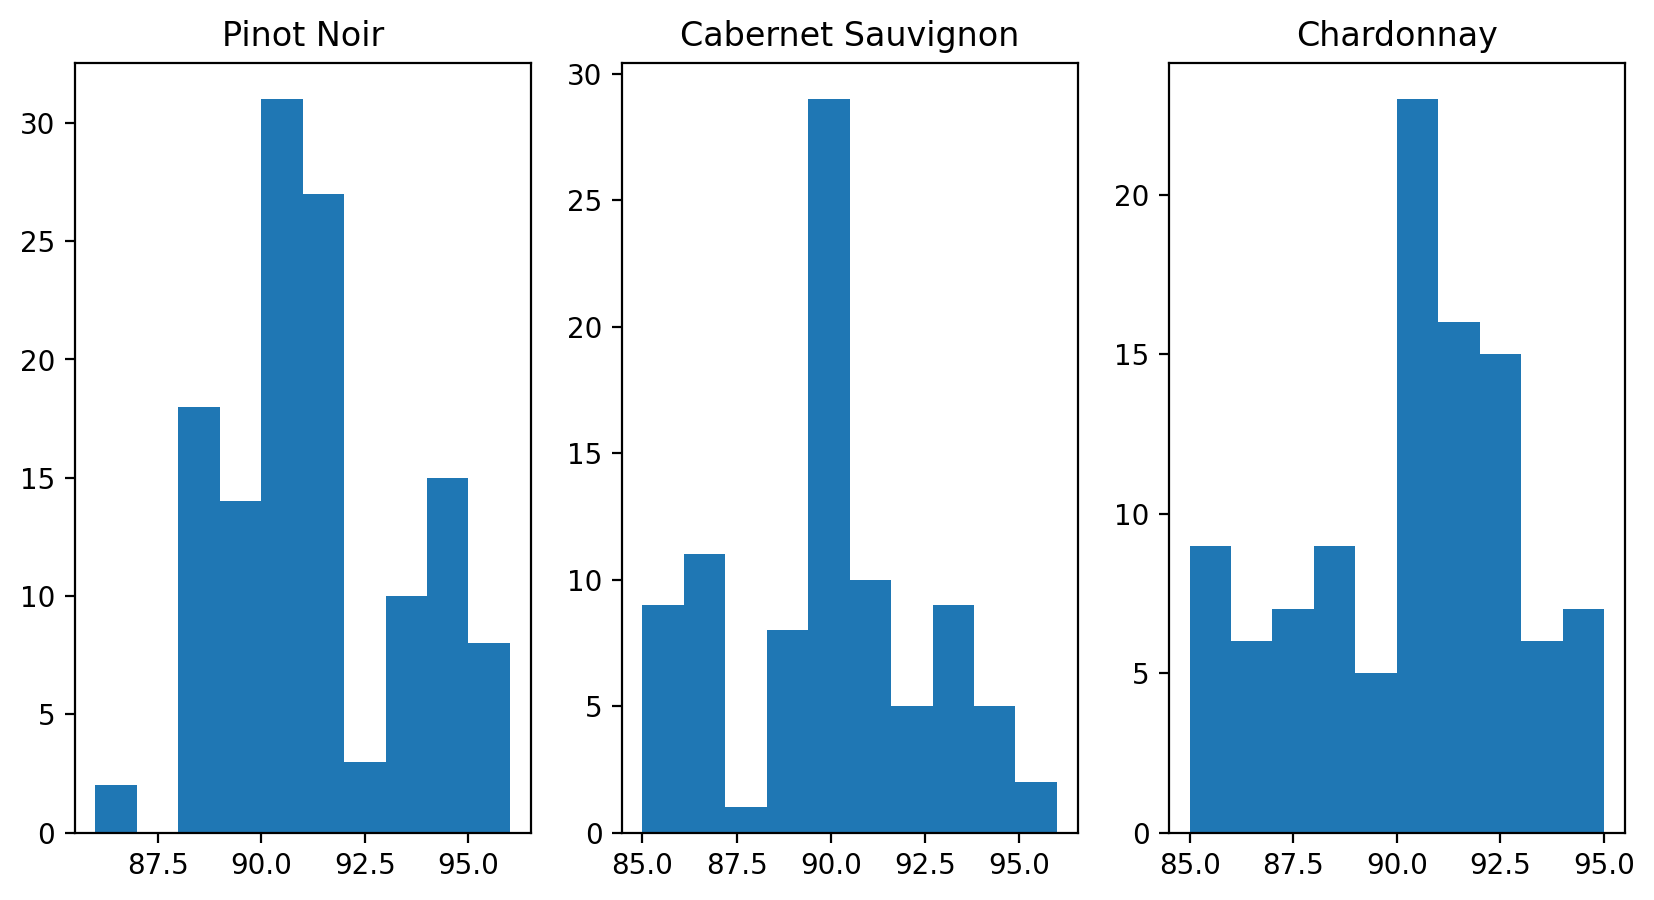

In [82]:
# plotting a multiplot histogram of the points and variety
df1 = pd.DataFrame(df[df['variety']=='Pinot Noir'])
df1_p = df1['points']
df2 = pd.DataFrame(df[df['variety']=='Cabernet Sauvignon'])
df2_p = df2['points']
df3= pd.DataFrame(df[df['variety']=='Chardonnay'])
df3_p = df3['points']

y1 = df1_p
y2 = df2_p
y3 = df3_p

fig = plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.hist(y1)
plt.title('Pinot Noir')

plt.subplot(1,3,2)
plt.hist(y2)
plt.title('Cabernet Sauvignon')

plt.subplot(1,3,3)
plt.hist(y3)
plt.title('Chardonnay')

The Pinot Noir has the highest frequencies in 90 and 95 points, Cabrenet Sauvignon and Chardonnay have lower frequencies for 90 and 95 points, so we can see as oberved above that Pinot Noir is amongst the varieties with the highest points which means it is a wine of good quality.

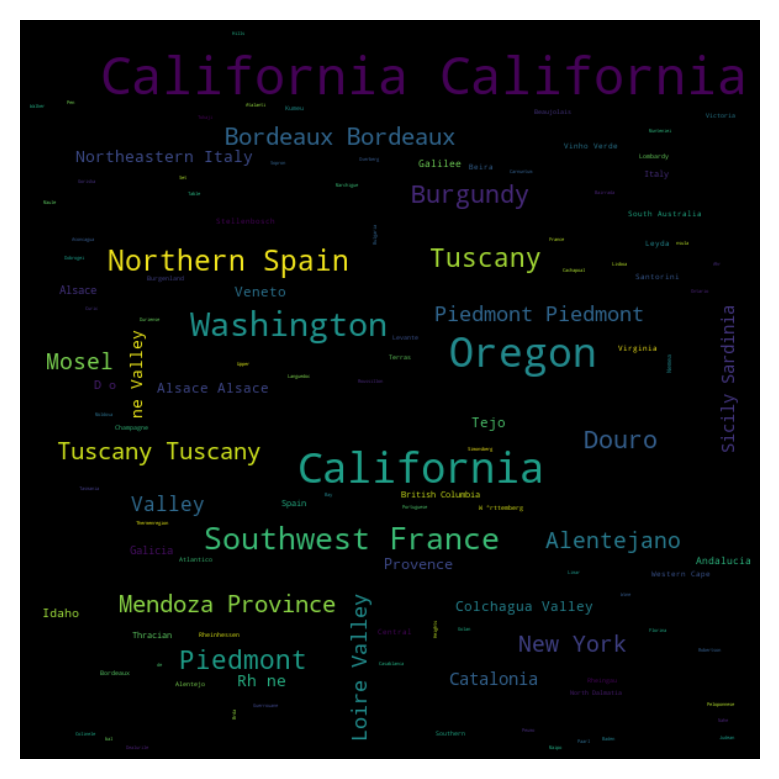

In [140]:
# creating a word cloud of province
import wordcloud
from wordcloud import WordCloud

province = df['province'].astype('string')
text = province
text = " ".join(i for i in text)
wordcloud = WordCloud(width =600, height =600, margin=10).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.margins(x= 0, y= 0)
plt.show()

The words that appear in larger font appear more frequently in the data, the words that are in smaller font appear less frequently, so Califonia, Oregon, Washington,Northern Spain and Tuscany the most common provinces.

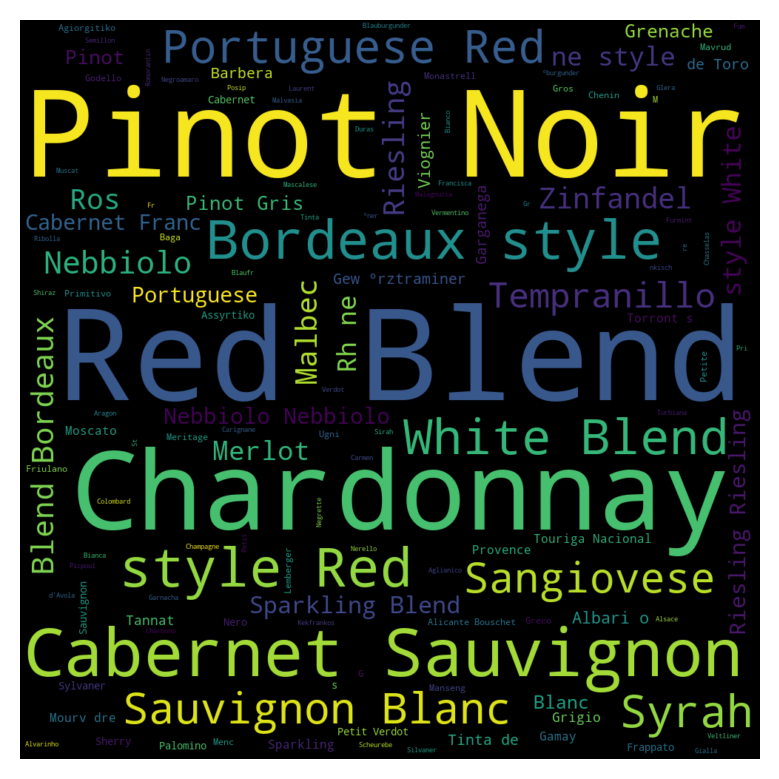

In [138]:
#creating word cloud for variety

variety= df['variety'].astype('string')
text = variety
text = " ".join(i for i in text)
wordcloud = WordCloud(width =1000, height =1000, margin=10).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.margins(x= 0, y= 0)
plt.show()

Piont Noir, Red Blend,Cabernet Sauvignon, Chardonnay, Bordeaux Style are the most common wine varieties.